# Inicialização

In [1]:
import numpy as np
from sklearn.linear_model import BayesianRidge
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Classe BayesianLinearRegression

In [2]:
class BayesianLinearRegression:
  def __init__(self, P = 1, m0 = None, S0 = None, std_e = 0.01, std_w = 1):
    self.coef = np.array([])
    self.dp = np.array([])
    self.P = P
    self.m0 = m0
    self.S0 = S0
    self.std_e = std_e
    self.std_w = std_w

  def func_base(self, X):
    if self.P == 0: return X
    novo_X = []
    for i in range(X.shape[0]):
      linha = [1]
      try:
        for elemento in X[i]:
          for pot in range(1, self.P+1):
            linha.append(elemento ** pot)
      except:
        for pot in range(1, self.P+1):
          linha.append(X[i] ** pot)
      novo_X.append(linha)

    return np.array(novo_X)

  def fit(self, X, y):
    X_orig = X
    X = self.func_base(X)

    if self.m0 == None: self.m0 = np.zeros(X.shape[1])
    else: self.m0 = m0

    if self.S0 == None: self.S0 = np.eye(X.shape[1]) * self.std_w**2
    else: self.S0 = S0


    try:
      I = np.eye(X.shape[1])
    except:
      I = np.eye(2)
    m0 = self.m0
    S0 = self.S0

    std_e = self.std_e
    std_w = self.std_w

    #      (n,1) + ( (m,m) @ (m,n) @ (n,m) + (1,1) * (m,m) ) @ (m,m) @ (m,n)
    coef = m0 + np.linalg.inv(S0 @ X.T @ X + (std_e/std_w)**2 * I) @ S0 @ X.T @ (y - X @ m0)
    dp = S0 - np.linalg.inv(S0 @ X.T @ X + std_e**2 * I) @ S0 @ X.T @ X @ S0

    self.coef = coef
    self.dp = dp

  def predict(self, X):
    X = self.func_base(X)
    dp = X @ self.dp @ X.T
    return (X @ self.coef, dp + self.std_e**2 * np.eye(X.shape[0]) )


# Questão 1

In [11]:
df = pd.read_csv("linear_regression_data.csv", header = None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

## Regressão Linear - Resultados

In [12]:
model = BayesianLinearRegression(P = 1, std_e = 0.15)

# Classe feita
print("Classe criada:")
model.fit(x, y)
y_pred, mat_cov = model.predict(x)
dp = np.sqrt(mat_cov.diagonal())
print("Coef:",model.coef)
print("y_pred:",y_pred)
print("std:",dp)


# SkLearn
X_modificado = model.func_base(x)

print("\nSklearn:")
sklearn_model = BayesianRidge(fit_intercept = False)
sklearn_model.fit(X_modificado,y)
y_pred2, y_std2 = sklearn_model.predict(X_modificado, return_std = True)
print("Coef:",sklearn_model.coef_)
print("y_pred:",y_pred2)
print("std:",y_std2)

Classe criada:
Coef: [-0.24238831  0.53190946]
y_pred: [-0.03338067 -0.46989734 -0.53296891 -0.18779869 -0.00891307 -0.32418912
  0.26905774 -0.04576294 -0.26267332 -0.35715574]
std: [0.16073357 0.16694343 0.17167329 0.15731304 0.16183105 0.15947563
 0.18357513 0.1602344  0.1578998  0.16071638]

Sklearn:
Coef: [-0.23136074  0.47009203]
y_pred: [-0.04664355 -0.43242913 -0.48817065 -0.18311541 -0.02501951 -0.30365482
  0.22064609 -0.05758677 -0.24928826 -0.33279013]
std: [0.21137269 0.21853798 0.2241052  0.20730809 0.21267002 0.20979813
 0.23846527 0.21078247 0.20797032 0.21124411]


## Plotar grafico

           x         y     upper     lower
0  -0.546297 -0.532969 -0.876315 -0.189622
1  -0.531067 -0.524868 -0.866906 -0.182830
2  -0.515836 -0.516766 -0.857523 -0.176010
3  -0.500605 -0.508665 -0.848167 -0.169163
4  -0.485375 -0.500564 -0.838839 -0.162288
..       ...       ...       ...       ...
95  0.900606  0.236653 -0.123869  0.597175
96  0.915837  0.244754 -0.117391  0.606899
97  0.931067  0.252855 -0.110936  0.616647
98  0.946298  0.260956 -0.104503  0.626416
99  0.961528  0.269058 -0.098093  0.636208

[100 rows x 4 columns]


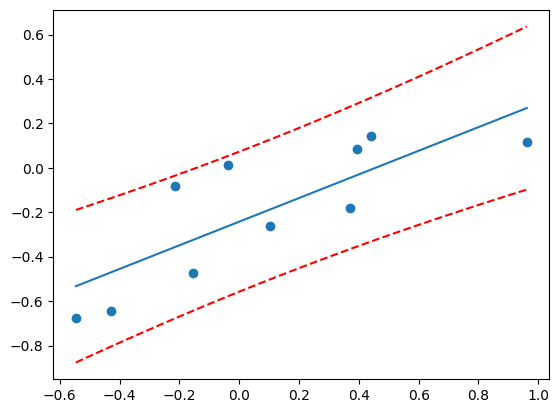

In [13]:
plt.scatter(x, y)

x_min = min(x)
x_max = max(x)

x_grafico = np.linspace(x_min, x_max, 100)
y_grafico, mat_cov_grafico = model.predict(x_grafico)
std = np.sqrt(mat_cov_grafico.diagonal())

upper = y_grafico - 2 * std
lower = y_grafico + 2 * std
df = pd.DataFrame()
df["x"] = x_grafico
df["y"] = y_grafico
df["upper"] = upper
df["lower"] = lower


df = df.sort_values("x")
print(df)


plt.plot(df.x, df.y)
plt.plot(df.x, df.lower, "r--")
plt.plot(df.x, df.upper, "r--")

# Questão 2

In [6]:
df = pd.read_csv("polynomial_regression_data.csv", header = None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

## Regressão Polinomial - Resultados

In [7]:
model = BayesianLinearRegression(P = 5, std_e = 0.2)

# Classe feita
print("Classe feita:")
model.fit(x, y)
y_pred, y_std = model.predict(x)
dp = np.sqrt(y_std.diagonal())

print("Coef:",model.coef)
print("y_pred:",y_pred)
print("std:",dp)

# SkLearn
X_modificado = model.func_base(x)

print("\nSklearn:")
sklearn_model = BayesianRidge(fit_intercept = False)
sklearn_model.fit(X_modificado,y)
y_pred2, y_std2 = sklearn_model.predict(X_modificado, return_std = True)
print("Coef:",sklearn_model.coef_)
print("y_pred:",y_pred2)
print("std:",y_std2)

Classe feita:
Coef: [ 1.6198493  -2.33875947 -1.99040568 -0.55007657  0.90279931  2.07238824]
y_pred: [-0.60831311  0.78481244  0.98408313 -0.17774278 -0.65656592  0.289353
 -0.39152627 -0.5812213   0.07512178  0.40413339]
std: [0.2203514  0.22400586 0.23316981 0.21407013 0.22145288 0.21363896
 0.27751998 0.21979071 0.21288233 0.21483687]

Sklearn:
Coef: [ 1.07769929  1.40198312 -5.79962826 -4.23374114  1.1106313   6.52836244]
y_pred: [-0.85824341  0.92479336  1.05472121 -0.18649104 -0.93633005  0.43607788
 -0.16825471 -0.814292    0.16696197  0.56723316]
std: [0.15456749 0.15539036 0.17348266 0.14955607 0.15746307 0.15111818
 0.19211242 0.15329637 0.15113673 0.15065897]


## Plotar grafico

           x         y     upper     lower
0   0.226851  0.984083  0.517744  1.450423
1   0.234467  0.959173  0.495551  1.422795
2   0.242082  0.934052  0.473038  1.395067
3   0.249697  0.908725  0.450209  1.367241
4   0.257313  0.883197  0.427072  1.339321
..       ...       ...       ...       ...
95  0.950303 -0.529833 -1.045594 -0.014073
96  0.957918 -0.498728 -1.022943  0.025487
97  0.965534 -0.465348 -0.998888  0.068193
98  0.973149 -0.429634 -0.973430  0.114163
99  0.980764 -0.391526 -0.946566  0.163514

[100 rows x 4 columns]


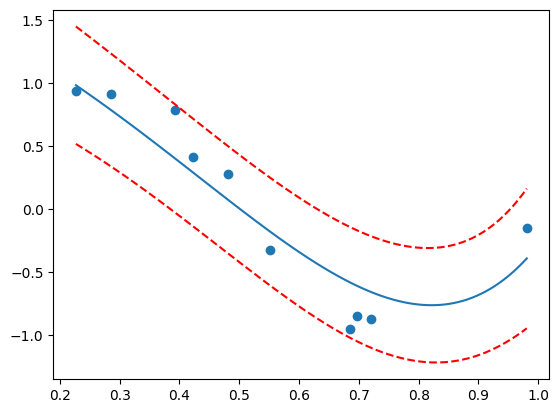

In [8]:
plt.scatter(x, y)

x_min = min(x)
x_max = max(x)

x_grafico = np.linspace(x_min, x_max, 100)
y_grafico, mat_cov_grafico = model.predict(x_grafico)
std = np.sqrt(mat_cov_grafico.diagonal())

upper = y_grafico - 2 * std
lower = y_grafico + 2 * std
df = pd.DataFrame()
df["x"] = x_grafico
df["y"] = y_grafico
df["upper"] = upper
df["lower"] = lower


df = df.sort_values("x")
print(df)


plt.plot(df.x, df.y)
plt.plot(df.x, df.lower, "r--")
plt.plot(df.x, df.upper, "r--")

# Considerações finais:

Não consegui pensar em uma forma de escolher a variância dos erros de forma automática então eu escolhi a partir da visualização dos gráficos.  
Para a primeira questão o desvio padrão escolhido foi de 0.15.  
Para a segunda questão o desvio padrão escolhido foi de 0.2.  
Em ambos os casos as amostras ficaram dentro do intervalo de confiança de 95% percentil (equivalente a 2 desvios padrão).  
  
E para fins de comparação, eu incluí os resultados do modelo do Sklearn.